+ nhìn chung với mạng tuần tự thì SELU ( scale elu)  > ELU > leaky relu > relu > tanh > logistic.
+ nếu cấu trúc mạng không cho phép tự chuẩn hóa ( deep and wide) thì elu hoạt động tốt hơn.
+ Nếu quan trọng về thời gian dự đoán hãy dùng leaky relu,
+ Mạng quá khớp RReLU
+ tập huấn luyện lớn PReLu
+ Dùng nhiều nhất ReLu

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# For loading images
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.9 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics
!pip install -e .

In [ ]:
%cd /content
!curl -L "https://app.roboflow.com/ds/co64WOOPNh?key=7szGA1deQh" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Assume the model will be :
train/
        class_1/
        class_2/
        ...
    valid/
        class_1/
        class_2/
        ...
    test/
        class_1/
        class_2/
        ...

In [6]:
import os
import cv2
import numpy as np

img_size = (28, 28)  # Adjust based on your dataset, similar to MNIST's 28x28 size

def load_data_with_labels(image_dir, label_dir):
    images = []
    labels = []
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp')

    for img_file in os.listdir(image_dir):
        if not img_file.lower().endswith(valid_extensions):
            continue  # Skip non-image files

        img_path = os.path.join(image_dir, img_file)
        label_path = os.path.join(label_dir, img_file.rsplit('.', 1)[0] + '.txt')  # Assume label file is .txt

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Warning: {img_path} could not be loaded.")
            continue  # Skip this file

        img = cv2.resize(img, img_size)
        img = img / 255.0  # Normalize the image

        # Load the label (assuming first number in .txt file is the class label)
        with open(label_path, 'r') as f:
            label = f.readline().strip().split()[0]  # Read the first value (class label)

        images.append(img)
        labels.append(int(label))  # Assuming labels are integers

    images = np.array(images).reshape(-1, img_size[0], img_size[1], 1)
    labels = np.array(labels)
    return images, labels


# Define directories
train_img_dir = '/content/train/images/'
train_label_dir = '/content/train/labels/'
valid_img_dir = '/content/valid/images/'
valid_label_dir = '/content/valid/labels/'
test_img_dir = '/content/test/images/'
test_label_dir = '/content/test/labels/'

# Load data
X_train, y_train = load_data_with_labels(train_img_dir, train_label_dir)
X_valid, y_valid = load_data_with_labels(valid_img_dir, valid_label_dir)
X_test, y_test = load_data_with_labels(test_img_dir, test_label_dir)



In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")


In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="selu",
                                    kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

In [ ]:
# sử dụng relu để so sánh
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

# Batch Normalization

In [31]:
# extra code - clear the name counters and set the random seed
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [32]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [33]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [34]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1690 - loss: 2.5642 - val_accuracy: 0.2154 - val_loss: 2.1619
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3685 - loss: 1.8459 - val_accuracy: 0.3245 - val_loss: 1.9555
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4545 - loss: 1.5926 - val_accuracy: 0.3803 - val_loss: 1.8550
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5313 - loss: 1.4073 - val_accuracy: 0.4016 - val_loss: 1.8217
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6054 - loss: 1.2543 - val_accuracy: 0.4096 - val_loss: 1.8075
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6675 - loss: 1.1166 - val_accuracy: 0.4309 - val_loss: 1.8065
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7224 - loss: 0.9877 - val_accuracy: 0.4495 - val_loss: 1.8081
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7724 - loss: 0.8676 - val_acc

In [12]:
# dùng batchnorm trước hàm kích hoạt

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1678 - loss: 2.3864 - val_accuracy: 0.1676 - val_loss: 2.1846
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3020 - loss: 1.9422 - val_accuracy: 0.2793 - val_loss: 2.0325
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3748 - loss: 1.7749 - val_accuracy: 0.3404 - val_loss: 1.9278
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4251 - loss: 1.6520 - val_accuracy: 0.3750 - val_loss: 1.8661
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4761 - loss: 1.5474 - val_accuracy: 0.3883 - val_loss: 1.8282
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5218 - loss: 1.4528 - val_accuracy: 0.4096 - val_loss: 1.8108
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5679 - loss: 1.3642 - val_accuracy: 0.4016 - val_loss: 1.7946
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6037 - loss: 1.2802 - val_accu

# Gradient Clipping

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")
model.save("/content/my_model_A.h5")

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1588 - loss: 2.4122 - val_accuracy: 0.1888 - val_loss: 2.1641
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3159 - loss: 1.9405 - val_accuracy: 0.2899 - val_loss: 1.9965
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3691 - loss: 1.7785 - val_accuracy: 0.3590 - val_loss: 1.8880
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4256 - loss: 1.6632 - val_accuracy: 0.4016 - val_loss: 1.8501
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4745 - loss: 1.5671 - val_accuracy: 0.4149 - val_loss: 1.8174
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5118 - loss: 1.4807 - val_accuracy: 0.4335 - val_loss: 1.7826
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5413 - loss: 1.3999 - val_accuracy: 0.4521 - val_loss: 1.7696
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5709 - loss: 1.3219 - val_accu

Test accuracy: 0.49


In [13]:
# kĩ thuật giới hạn gradient trong một khoảng nhất định để hạn chế bùng nổ gradient,
# Kĩ thuật này được sử dụng nhiều trong mạng nơ-ron hồi tiếp vì chuẩn hóa theo Batch khó dùng trong mạng này

In [35]:
# clip value
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)
# clip norm
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)

# Tái sử dụng các tầng đã huấn luyện

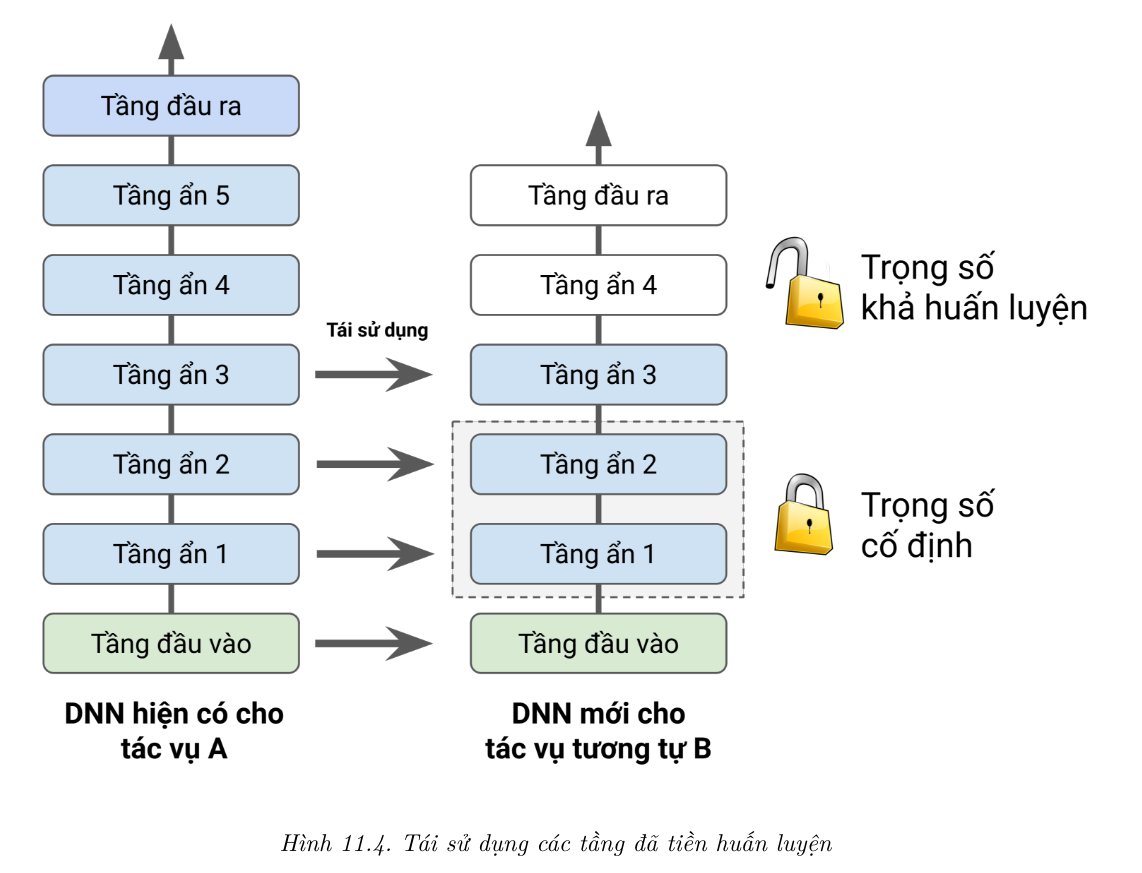

Explanation:
Directory Structure: The code assumes your images and labels are organized in train, valid, and test subdirectories.

Class Groups:

pos_class_id and neg_class_id are the class indices used for task B (binary classification).

Other classes are used for task A (multi-class classification).
Splitting:

Images with labels matching pos_class_id or neg_class_id go into task B.
Images with other labels go into task A, and the class labels are re-indexed.
Normalization: Images are resized and normalized to the range [0, 1].

In [36]:
import os
import cv2
import numpy as np

img_size = (28, 28)  # Adjust to your dataset's size

# Assume class_names contains all your class names, e.g., ["T-shirt/top", "Trouser", ...]
class_names = ['SpeedLimit_100', 'SpeedLimit_120', 'SpeedLimit_30', 'SpeedLimit_40', 'SpeedLimit_50', 'SpeedLimit_60', 'SpeedLimit_70', 'SpeedLimit_80', 'SpeedLimit_90', 'no-stopping']  # Define this based on your dataset

# Define class indices for tasks A and B
pos_class_id = class_names.index("SpeedLimit_100")  # Example
neg_class_id = class_names.index("SpeedLimit_120")  # Example

def load_and_split_dataset(image_dir, label_dir, pos_class_id, neg_class_id):
    X_A, y_A = [], []
    X_B, y_B = [], []

    for img_file in os.listdir(image_dir):
        if not img_file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            continue  # Skip non-image files

        img_path = os.path.join(image_dir, img_file)
        label_path = os.path.join(label_dir, img_file.rsplit('.', 1)[0] + '.txt')

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Warning: {img_path} could not be loaded.")
            continue

        img = cv2.resize(img, img_size)
        img = img / 255.0  # Normalize the image

        with open(label_path, 'r') as f:
            label = int(f.readline().strip().split()[0])  # Assuming first value is the class label

        if label in [pos_class_id, neg_class_id]:
            X_B.append(img)
            y_B.append(1.0 if label == pos_class_id else 0.0)  # Binary classification for task B
        else:
            X_A.append(img)
            y_A.append(label)

    # Reorder class ids for task A
    old_class_ids = list(set(range(len(class_names))) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(len(old_class_ids))):
        y_A = [new_class_id if y == old_class_id else y for y in y_A]

    X_A = np.array(X_A).reshape(-1, img_size[0], img_size[1], 1)
    y_A = np.array(y_A)
    X_B = np.array(X_B).reshape(-1, img_size[0], img_size[1], 1)
    y_B = np.array(y_B)

    return (X_A, y_A), (X_B, y_B)

# Define your directories
train_img_dir = '/content/train/images/'
train_label_dir = '/content/train/labels/'
valid_img_dir = '/content/valid/images/'
valid_label_dir = '/content/valid/labels/'
test_img_dir = '/content/test/images/'
test_label_dir = '/content/test/labels/'

# Load and split the datasets
(X_train_A, y_train_A), (X_train_B, y_train_B) = load_and_split_dataset(train_img_dir, train_label_dir, pos_class_id, neg_class_id)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = load_and_split_dataset(valid_img_dir, valid_label_dir, pos_class_id, neg_class_id)
(X_test_A, y_test_A), (X_test_B, y_test_B) = load_and_split_dataset(test_img_dir, test_label_dir, pos_class_id, neg_class_id)

# Optionally, limit the size of task B's training data
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]


tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(8, activation="softmax")
])

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))
model_A.save("/content/my_model_A.h5")




Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1469 - loss: 2.1415 - val_accuracy: 0.2114 - val_loss: 2.0779
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1883 - loss: 2.0168 - val_accuracy: 0.2148 - val_loss: 2.0781
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2004 - loss: 1.9782 - val_accuracy: 0.2282 - val_loss: 2.0857
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2072 - loss: 1.9548 - val_accuracy: 0.2349 - val_loss: 2.0888
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2254 - loss: 1.9376 - val_accuracy: 0.2517 - val_loss: 2.0877
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2358 - loss: 1.9239 - val_accuracy: 0.2651 - val_loss: 2.0859
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2394 - loss: 1.9123 - val_accuracy: 0.2517 - val_loss: 2.0824
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2401 - loss: 1.9023 - val_accuracy: 0.2651 - val_loss:

In [19]:
# extra code – train and evaluate model B, without reusing model A

tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_B.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_B.fit(X_train_B, y_train_B, epochs=200,
                      validation_data=(X_valid_B, y_valid_B))
model_B.evaluate(X_test_B, y_test_B)
test_loss, test_acc = model_B.evaluate(X_test_B, y_test_B)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Optionally, make predictions
y_pred = model.predict(X_test_B)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compare predictions with true labels
print(f"Predicted classes: {y_pred_classes[:10]}")
print(f"True classes: {y_test[:10]}")

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5472 - loss: 0.7779 - val_accuracy: 0.6282 - val_loss: 0.6733
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5472 - loss: 0.7203 - val_accuracy: 0.6538 - val_loss: 0.6626
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5580 - loss: 0.6904 - val_accuracy: 0.6923 - val_loss: 0.6616
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5661 - loss: 0.6755 - val_accuracy: 0.6923 - val_loss: 0.6636
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5928 - loss: 0.6675 - val_accuracy: 0.6667 - val_loss: 0.6662
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6100 - loss: 0.6624 - val_accuracy: 0.6538 - val_loss: 0.6683
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6361 - loss: 0.6587 - val_accuracy: 0.6282 - val_loss: 0.6697
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6467 - loss: 0.6557 - val_accuracy: 0.6154 - val_loss:

Sử dụng model A để train model B

In [21]:
tf.random.set_seed(42)  # extra code – ensure reproducibility
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())


model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [22]:
# vì tầng cuối cùng mới được khởi tạo ngẫu nhiên lỗi của mô hình sẽ tương đối lớn ( ít nhất trong vài epoch đầu tiên)
# Điều này có thể gây ra  những lỗi gradient lớn và làm hỏng các trọng số được tái sử dụng
# Để tránh điều này ta có thể đóng băng những tầng tái sử dụng trong những epoch đầu tiên
# nhằm cho cá tầng mới có thêm thời gian học được trọng số phù hợp.
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])



In [24]:

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer,
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=200,
                           validation_data=(X_valid_B, y_valid_B))

test_loss, test_acc = model_B_on_A.evaluate(X_test_B, y_test_B)
print(f"Test accuracy: {test_acc:.2f}")

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7666 - loss: 0.5354 - val_accuracy: 0.6282 - val_loss: 0.6383
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7666 - loss: 0.5346 - val_accuracy: 0.6282 - val_loss: 0.6381
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7666 - loss: 0.5337 - val_accuracy: 0.6282 - val_loss: 0.6380
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7666 - loss: 0.5330 - val_accuracy: 0.6282 - val_loss: 0.6378
Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7666 - loss: 0.5322 - val_accuracy: 0.6282 - val_loss: 0.6376
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7666 - loss: 0.5313 - val_accuracy: 0.6282 - val_loss: 0.6374
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7666 - loss: 0.5306 - val_accuracy: 0.6282 - val_loss: 0.6372
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7666 - loss: 0.5299 - val_accuracy: 0.6282 - val_loss: 0.6369
Epo

Độ chính xác được cải thiện nhiều hơn


Tuy nhiên transfer learning không phù hợp với mạng kết nối dày đặc nhỏ ,các mạng dày đặc nhỏ học được ít khuôn mẫu và các mạng dày đặc lại học các khuôn mẫu rất cụ thể không thực sự hữu ích trên các tác vụ khác. Tranfer learning hoạt động tốt nhất với các mạng nơ-ron tích chập sâu.

Trong bài toán rất nhiều dữ liệu không gán nhãn, ta có thể dùng chúng để huấn luyện một mô hình học không giám sát ( ví dụ bộ tự mã hóa hoặc mạng đối sinh GAN). Sau đó tái sử dụng các tầng thấp của bộ tự mã hóa hoặc bộ phận đặc biệt của GAN, thêm tầng đầu ra cho tác vụ của ta và tinh chỉnh mô hình cuối cùng bằng học có giám sát (tức là huấn luyện với các mẫu có nhãn)

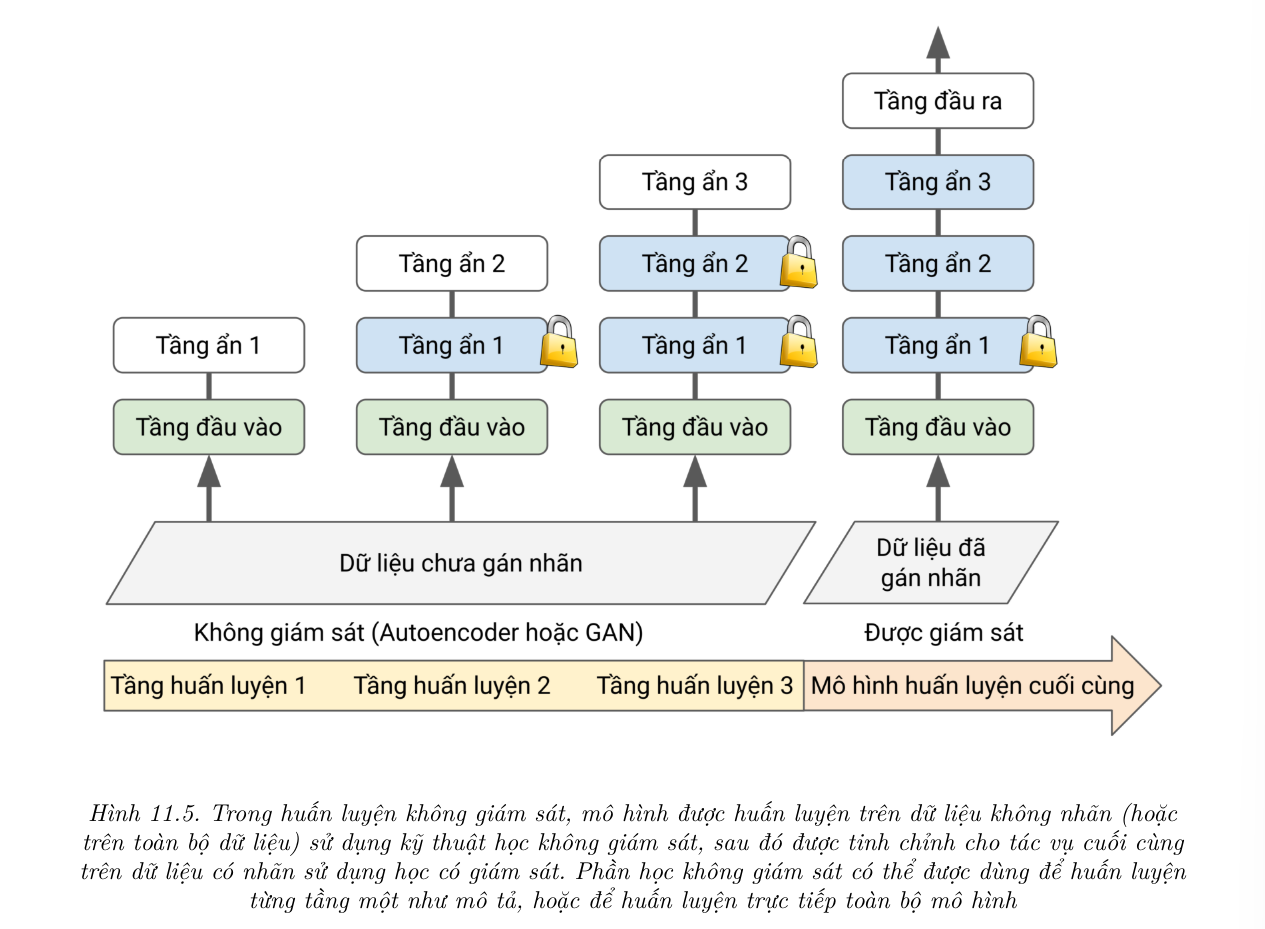

Self-supervised learning is when you automatically generate the
labels from the data itself, as in the text-masking example, then you
train a model on the resulting “labeled” dataset using supervised
learning techniques.

# Faster Optimizers

In [25]:

def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=700,
                        validation_data=(X_valid, y_valid))
    return model, history

In [26]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [27]:
model,history_sgd = build_and_train_model(optimizer)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Optionally, make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compare predictions with true labels
print(f"Predicted classes: {y_pred_classes[:10]}")
print(f"True classes: {y_test[:10]}")


Epoch 1/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1725 - loss: 2.2148 - val_accuracy: 0.1702 - val_loss: 2.2567
Epoch 2/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2348 - loss: 2.1051 - val_accuracy: 0.1782 - val_loss: 2.1995
Epoch 3/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2629 - loss: 2.0503 - val_accuracy: 0.2021 - val_loss: 2.1464
Epoch 4/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2785 - loss: 2.0069 - val_accuracy: 0.2128 - val_loss: 2.0930
Epoch 5/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2971 - loss: 1.9717 - val_accuracy: 0.2447 - val_loss: 2.0680
Epoch 6/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3151 - loss: 1.9423 - val_accuracy: 0.2739 - val_loss: 2.0402
Epoch 7/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3280 - loss: 1.9140 - val_accuracy: 0.2952 - val_loss: 2.0163
Epoch 8/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3380 - loss: 1.8868 - val_accu

# Momentum optimization

In [37]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)


In [38]:
model,history_momentum = build_and_train_model(optimizer)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Optionally, make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compare predictions with true labels
print(f"Predicted classes: {y_pred_classes[:10]}")
print(f"True classes: {y_test[:10]}")


Epoch 1/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1467 - loss: 2.2729 - val_accuracy: 0.2979 - val_loss: 2.2009
Epoch 2/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2297 - loss: 2.1083 - val_accuracy: 0.2660 - val_loss: 2.1709
Epoch 3/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2547 - loss: 2.0607 - val_accuracy: 0.2500 - val_loss: 2.1465
Epoch 4/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2657 - loss: 2.0215 - val_accuracy: 0.2394 - val_loss: 2.1168
Epoch 5/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2747 - loss: 1.9906 - val_accuracy: 0.2447 - val_loss: 2.0911
Epoch 6/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2912 - loss: 1.9595 - val_accuracy: 0.2633 - val_loss: 2.0646
Epoch 7/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3095 - loss: 1.9311 - val_accuracy: 0.2660 - val_loss: 2.0511
Epoch 8/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3170 - loss: 1.9042 - val_accu

# Nesterov Accelerated Gradient

In [39]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9,
                                    nesterov=True)

In [40]:
model,history_nesterov = build_and_train_model(optimizer)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Optionally, make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compare predictions with true labels
print(f"Predicted classes: {y_pred_classes[:20]}")
print(f"True classes: {y_test[:20]}")

Epoch 1/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1501 - loss: 2.2560 - val_accuracy: 0.2420 - val_loss: 2.2713
Epoch 2/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2144 - loss: 2.1380 - val_accuracy: 0.2473 - val_loss: 2.2133
Epoch 3/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2369 - loss: 2.0834 - val_accuracy: 0.2261 - val_loss: 2.1672
Epoch 4/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2560 - loss: 2.0392 - val_accuracy: 0.2394 - val_loss: 2.1212
Epoch 5/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2670 - loss: 2.0006 - val_accuracy: 0.2606 - val_loss: 2.0884
Epoch 6/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2880 - loss: 1.9674 - val_accuracy: 0.2713 - val_loss: 2.0673
Epoch 7/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3024 - loss: 1.9392 - val_accuracy: 0.2872 - val_loss: 2.0475
Epoch 8/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3089 - loss: 1.9126 - val_accu

# AdaGrad

In [41]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)
model, history_adagrad = build_and_train_model(optimizer)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Optionally, make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compare predictions with true labels
print(f"Predicted classes: {y_pred_classes[:20]}")
print(f"True classes: {y_test[:20]}")

Epoch 1/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1485 - loss: 2.3134 - val_accuracy: 0.2128 - val_loss: 2.3201
Epoch 2/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1768 - loss: 2.1920 - val_accuracy: 0.1941 - val_loss: 2.3069
Epoch 3/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1857 - loss: 2.1598 - val_accuracy: 0.1782 - val_loss: 2.2874
Epoch 4/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2122 - loss: 2.1379 - val_accuracy: 0.1888 - val_loss: 2.2703
Epoch 5/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2315 - loss: 2.1178 - val_accuracy: 0.1862 - val_loss: 2.2529
Epoch 6/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2412 - loss: 2.1001 - val_accuracy: 0.2048 - val_loss: 2.2363
Epoch 7/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2460 - loss: 2.0848 - val_accuracy: 0.2048 - val_loss: 2.2219
Epoch 8/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2547 - loss: 2.0714 - val_accu

# RMSProp

In [42]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1760 - loss: 2.2577 - val_accuracy: 0.2580 - val_loss: 2.1678
Epoch 2/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2289 - loss: 2.0832 - val_accuracy: 0.2899 - val_loss: 2.0761
Epoch 3/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2551 - loss: 2.0191 - val_accuracy: 0.3138 - val_loss: 1.9495
Epoch 4/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2940 - loss: 1.9413 - val_accuracy: 0.3511 - val_loss: 1.9000
Epoch 5/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3193 - loss: 1.8857 - val_accuracy: 0.3404 - val_loss: 1.9507
Epoch 6/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3308 - loss: 1.8253 - val_accuracy: 0.3644 - val_loss: 1.8910
Epoch 7/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3524 - loss: 1.7756 - val_accuracy: 0.3750 - val_loss: 1.8318
Epoch 8/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3742 - loss: 1.7215 - val_accu

# Adam Optimization

In [43]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)
history_adam = build_and_train_model(optimizer)

Epoch 1/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1756 - loss: 2.2194 - val_accuracy: 0.2314 - val_loss: 2.1538
Epoch 2/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2440 - loss: 2.0675 - val_accuracy: 0.2819 - val_loss: 2.0849
Epoch 3/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2671 - loss: 2.0020 - val_accuracy: 0.2899 - val_loss: 2.0556
Epoch 4/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2926 - loss: 1.9454 - val_accuracy: 0.3032 - val_loss: 2.0833
Epoch 5/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3278 - loss: 1.8779 - val_accuracy: 0.3351 - val_loss: 1.9604
Epoch 6/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3418 - loss: 1.8269 - val_accuracy: 0.3484 - val_loss: 1.9536
Epoch 7/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3619 - loss: 1.7697 - val_accuracy: 0.3564 - val_loss: 1.9456
Epoch 8/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3855 - loss: 1.7139 - val_accu

AttributeError: 'tuple' object has no attribute 'history'

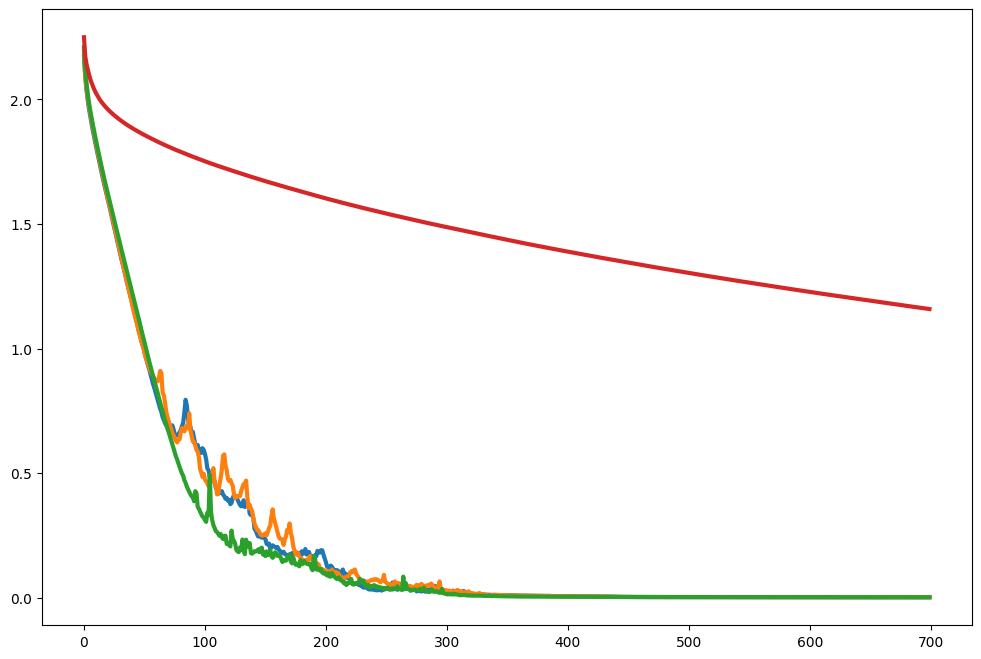

In [44]:

for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history_sgd, history_momentum, history_nesterov,
                                  history_adagrad, history_rmsprop, history_adam,
    ),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()

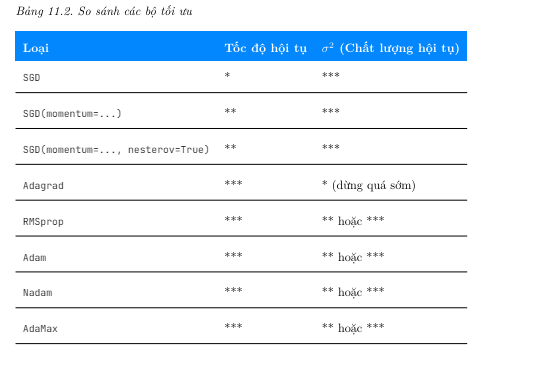

# Learning rate scheduling


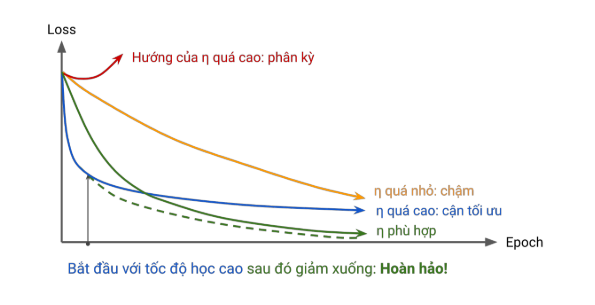

# Power Scheduling
learning_rate = initial_learning_rate / (1 + step / decay_steps)**power
- Keras uses power = 1.

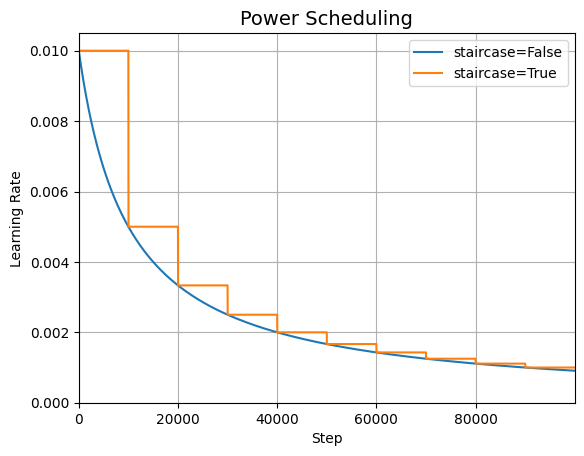

In [45]:
initial_learning_rate = 0.01
decay_rate = 1.0
decay_steps = 10_000

steps = np.arange(100_000)
lrs = initial_learning_rate / (1 + decay_rate * steps / decay_steps)
lrs2 = initial_learning_rate / (1 + decay_rate * np.floor(steps / decay_steps))

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [46]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
history_power_scheduling = build_and_train_model(optimizer)

Epoch 1/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1675 - loss: 2.2560 - val_accuracy: 0.1968 - val_loss: 2.2608
Epoch 2/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2174 - loss: 2.1089 - val_accuracy: 0.1995 - val_loss: 2.2191
Epoch 3/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2389 - loss: 2.0622 - val_accuracy: 0.2154 - val_loss: 2.1656
Epoch 4/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2551 - loss: 2.0271 - val_accuracy: 0.2473 - val_loss: 2.1293
Epoch 5/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2642 - loss: 1.9987 - val_accuracy: 0.2553 - val_loss: 2.0968
Epoch 6/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2849 - loss: 1.9739 - val_accuracy: 0.2633 - val_loss: 2.0662
Epoch 7/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2987 - loss: 1.9514 - val_accuracy: 0.2660 - val_loss: 2.0450
Epoch 8/700
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3059 - loss: 1.9304 - val_accu

# Exponential Scheduling
learning_rate = initial_learning_rate * decay_rate ** (step / decay_steps)

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=20_000,
    decay_rate=0.1,
    staircase=False
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
history_exponential_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6914 - loss: 1.0556 - val_accuracy: 0.9187 - val_loss: 0.2881
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9147 - loss: 0.2933 - val_accuracy: 0.9363 - val_loss: 0.2287
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9314 - loss: 0.2380 - val_accuracy: 0.9444 - val_loss: 0.1999
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9406 - loss: 0.2072 - val_accuracy: 0.9501 - val_loss: 0.1825
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9458 - loss: 0.1866 - val_accuracy: 0.9538 - val_loss: 0.1704
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9506 - loss: 0.1721 - val_accuracy: 0.9557 - val_loss: 0.1619
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9534 - loss: 0.1613 - val_accuracy: 0.9576 - val_loss: 0.1553
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9555 - loss: 0.1530 - 

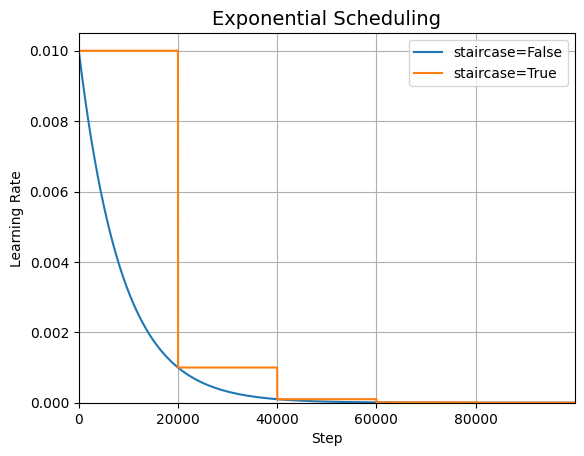

In [ ]:
initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Avoiding Overfitting Through Regularization

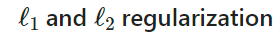

In [ ]:
layer = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [ ]:
tf.random.set_seed(42)

In [ ]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

In [ ]:
# extra code – compile and train the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7765 - loss: 4.1906 - val_accuracy: 0.9111 - val_loss: 1.8972
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9050 - loss: 1.6455 - val_accuracy: 0.9154 - val_loss: 1.0917


# Dropout

In [ ]:
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
# extra code – compile and train the model
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7512 - loss: 0.7713 - val_accuracy: 0.9448 - val_loss: 0.1802
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9133 - loss: 0.2864 - val_accuracy: 0.9623 - val_loss: 0.1288
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9292 - loss: 0.2308 - val_accuracy: 0.9658 - val_loss: 0.1128
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9362 - loss: 0.2023 - val_accuracy: 0.9689 - val_loss: 0.1062
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9449 - loss: 0.1808 - val_accuracy: 0.9722 - val_loss: 0.0950
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9482 - loss: 0.1692 - val_accuracy: 0.9724 - val_loss: 0.0923
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9530 - loss: 0.1541 - val_accuracy: 0.9739 - val_loss: 0.0889
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9506 - loss: 0.1561 - 

In [ ]:
model.evaluate(X_train, y_train)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9837 - loss: 0.0562


[0.05641387775540352, 0.9827799797058105]